# Project Proposal

### Title: Given these 13 factors, does the patient have heart disease?

1. Age: age in years

2. Sex: sex (1 = male; 0 = female)

3. Cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4: = asymptomatic)

4. Trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. Chol: serum cholestoral in mg/dl

6. Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. Restecg: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality [T wave inversions and/or ST elevation or depression of > 0.05 mV]; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. Thalach: maximum heart rate achieved

9. Exang: exercise induced angina (1 = yes; 0 = no)

10. Oldpeak = ST depression induced by exercise relative to rest

11. Slope: the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

12. Ca: number of major vessels (0-3) colored by fluoroscopy

13. Thal: thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)

14 Num: diagnosis of heart disease (0 = < 50% diameter narrowing; 1 = > 50% diameter narrowing)

https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/types-of-heart-disease


### Introduction:

Heart disease encompasses a group of conditions that can impair the structure or function of the heart. There are risk factors that increase heart disease that cannot be controlled such as sex, age, and genetics. The Heart Disease dataset from the UCI Machine Learning Repository examines the relationship between  13 factors and their effect on heart disease. The objective of our project is to examine some of these potential factors to identify patterns and make predictions that answer our research question: Given these 13 factors, does the patient have heart disease? 

### Preliminary exploratory data analysis:

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 15)
library(RColorBrewer)
library(cowplot)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
cleaveland <-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleaveland) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_BloodSugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
cleaveland <- cleaveland |>
    mutate(Number_of_Major_Vessels = as.numeric(Number_of_Major_Vessels)) |>
    mutate(Thal = as.numeric(Thal))       

calc_mode <- function(x){
  
  # List the distinct / unique values
  distinct_values <- unique(x)
  
  # Count the occurrence of each distinct value
  distinct_tabulate <- tabulate(match(x, distinct_values))
  
  # Return the value with the highest occurrence
  distinct_values[which.max(distinct_tabulate)]
}

cleaveland <- cleaveland |>
  mutate(across(everything(), ~replace_na(.x, calc_mode(.x))))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [4]:
cleaveland <- cleaveland  |>
    mutate(
        Heart_Disease_Diagnosis = case_when(
                Heart_Disease_Diagnosis != 0 ~ 1,
                Heart_Disease_Diagnosis == 0 ~ 0
            )
        )
    
head(cleaveland)
tail(cleaveland)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,0,3,0


In [5]:
set.seed(1)
data_split <- initial_split(cleaveland, prop = 0.75, strata = Heart_Disease_Diagnosis)
training_data <- training(data_split)
testing_date <- testing(data_split)
head(training_data)
tail(training_data)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
57,1,3,150,168,0,0,174,0,1.6,1,0,3,0


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67,1,3,152,212,0,2,150,0,0.8,2,0,7,1
63,1,4,140,187,0,2,144,1,4.0,1,2,7,1
59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [6]:
mean_table1 <- training_data |>
    filter(Heart_Disease_Diagnosis == 1) |>
    colMeans(na.rm = TRUE) 
mean_table1.matrix = matrix(data = mean_table1, nrow = 1, byrow = TRUE)
mean_table1.df = as.data.frame(mean_table1.matrix)
colnames(mean_table1.df) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_BloodSugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
mean_table1 = mean_table1.df 
mean_table1 <- mean_table1 |>
    pivot_longer(cols = Age:Heart_Disease_Diagnosis, names_to = "Variable", values_to = "Mean_Variable_Value_for_Patients_with_Heart_Disease") |>
    filter(Variable != "Heart_Disease_Diagnosis")


mean_table2 <- training_data |>
    filter(Heart_Disease_Diagnosis == 0) |>
    colMeans(na.rm = TRUE)
mean_table2.matrix = matrix(data = mean_table2, nrow = 1, byrow = TRUE)
mean_table2.df = as.data.frame(mean_table2.matrix)
colnames(mean_table2.df) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_BloodSugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
mean_table2 = mean_table2.df 
mean_table2 <- mean_table2 |>
    pivot_longer(cols = Age:Heart_Disease_Diagnosis, names_to = "Variable2", values_to = "Mean_Variable_Value_for_Patients_without_Heart_Disease") |>
    filter(Variable2 != "Heart_Disease_Diagnosis")

mean_table <- bind_cols(mean_table1, mean_table2) |>
    select(1, 2, 4) |>
    mutate(Ratio_of_Mean_for_Patients_with_Heart_Disease_to_that_without = Mean_Variable_Value_for_Patients_with_Heart_Disease/
           Mean_Variable_Value_for_Patients_without_Heart_Disease)
mean_table

Variable,Mean_Variable_Value_for_Patients_with_Heart_Disease,Mean_Variable_Value_for_Patients_without_Heart_Disease,Ratio_of_Mean_for_Patients_with_Heart_Disease_to_that_without
<chr>,<dbl>,<dbl>,<dbl>
Age,57.2307692,52.9674797,1.0804888
Sex,0.8461538,0.5447154,1.5533869
Chest_Pain_Type,3.5961538,2.7886179,1.2895829
Resting_Blood_Pressure,135.5096154,130.4552846,1.0387438
Cholesterol,250.5673077,243.9105691,1.0272917
Fasting_BloodSugar,0.1538462,0.1382114,1.1131222
Resting_ECG,1.1730769,0.8373984,1.4008588
Max_Heart_Rate,138.2307692,158.6747967,0.8711577
Exercise_Induced_Angina,0.5576923,0.1300813,4.2872596


`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.


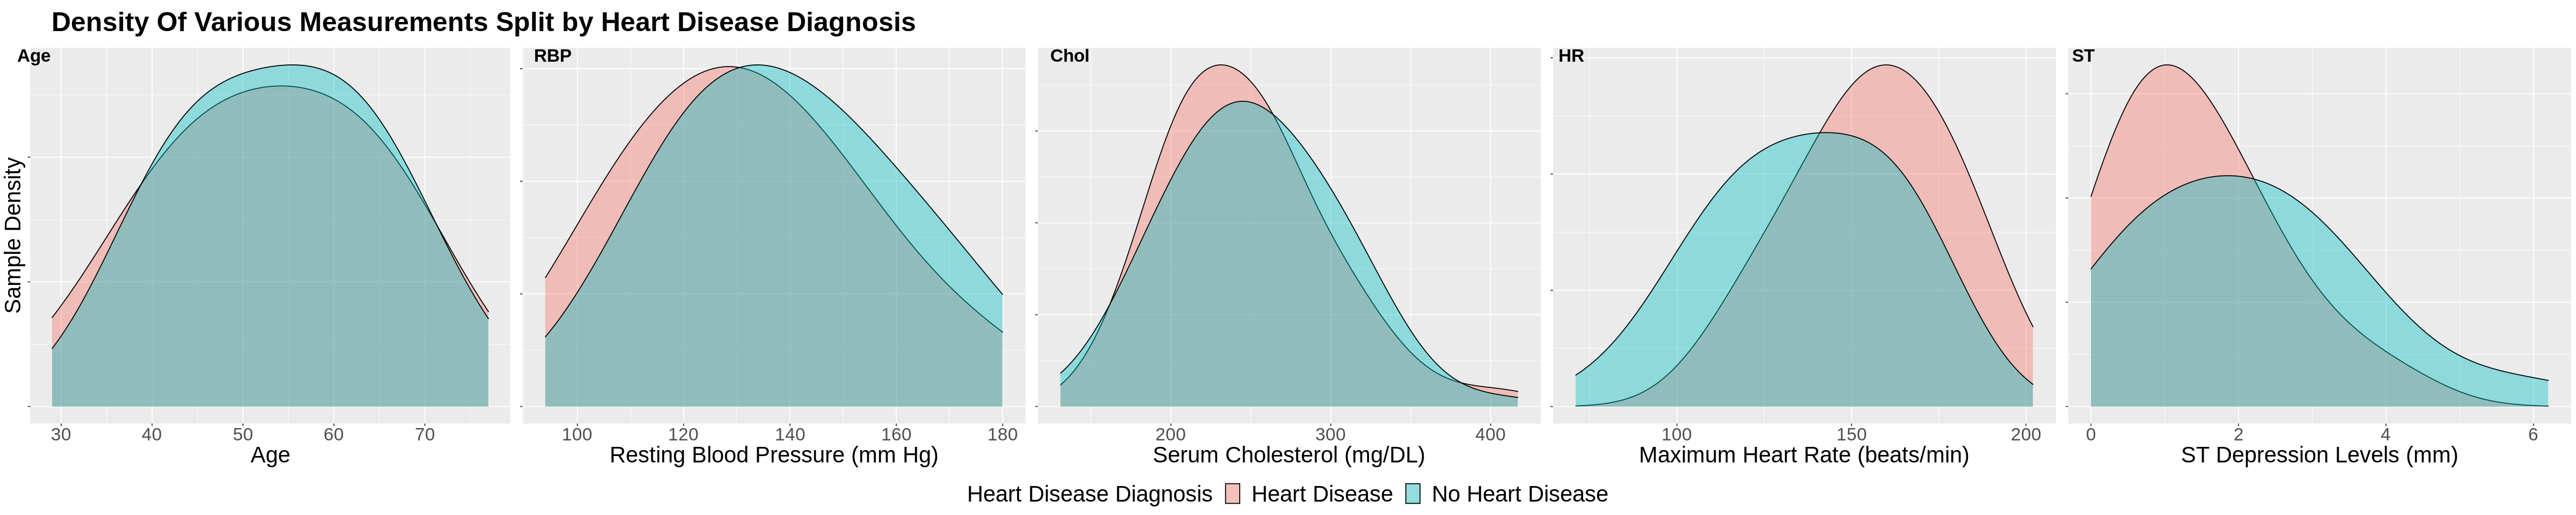

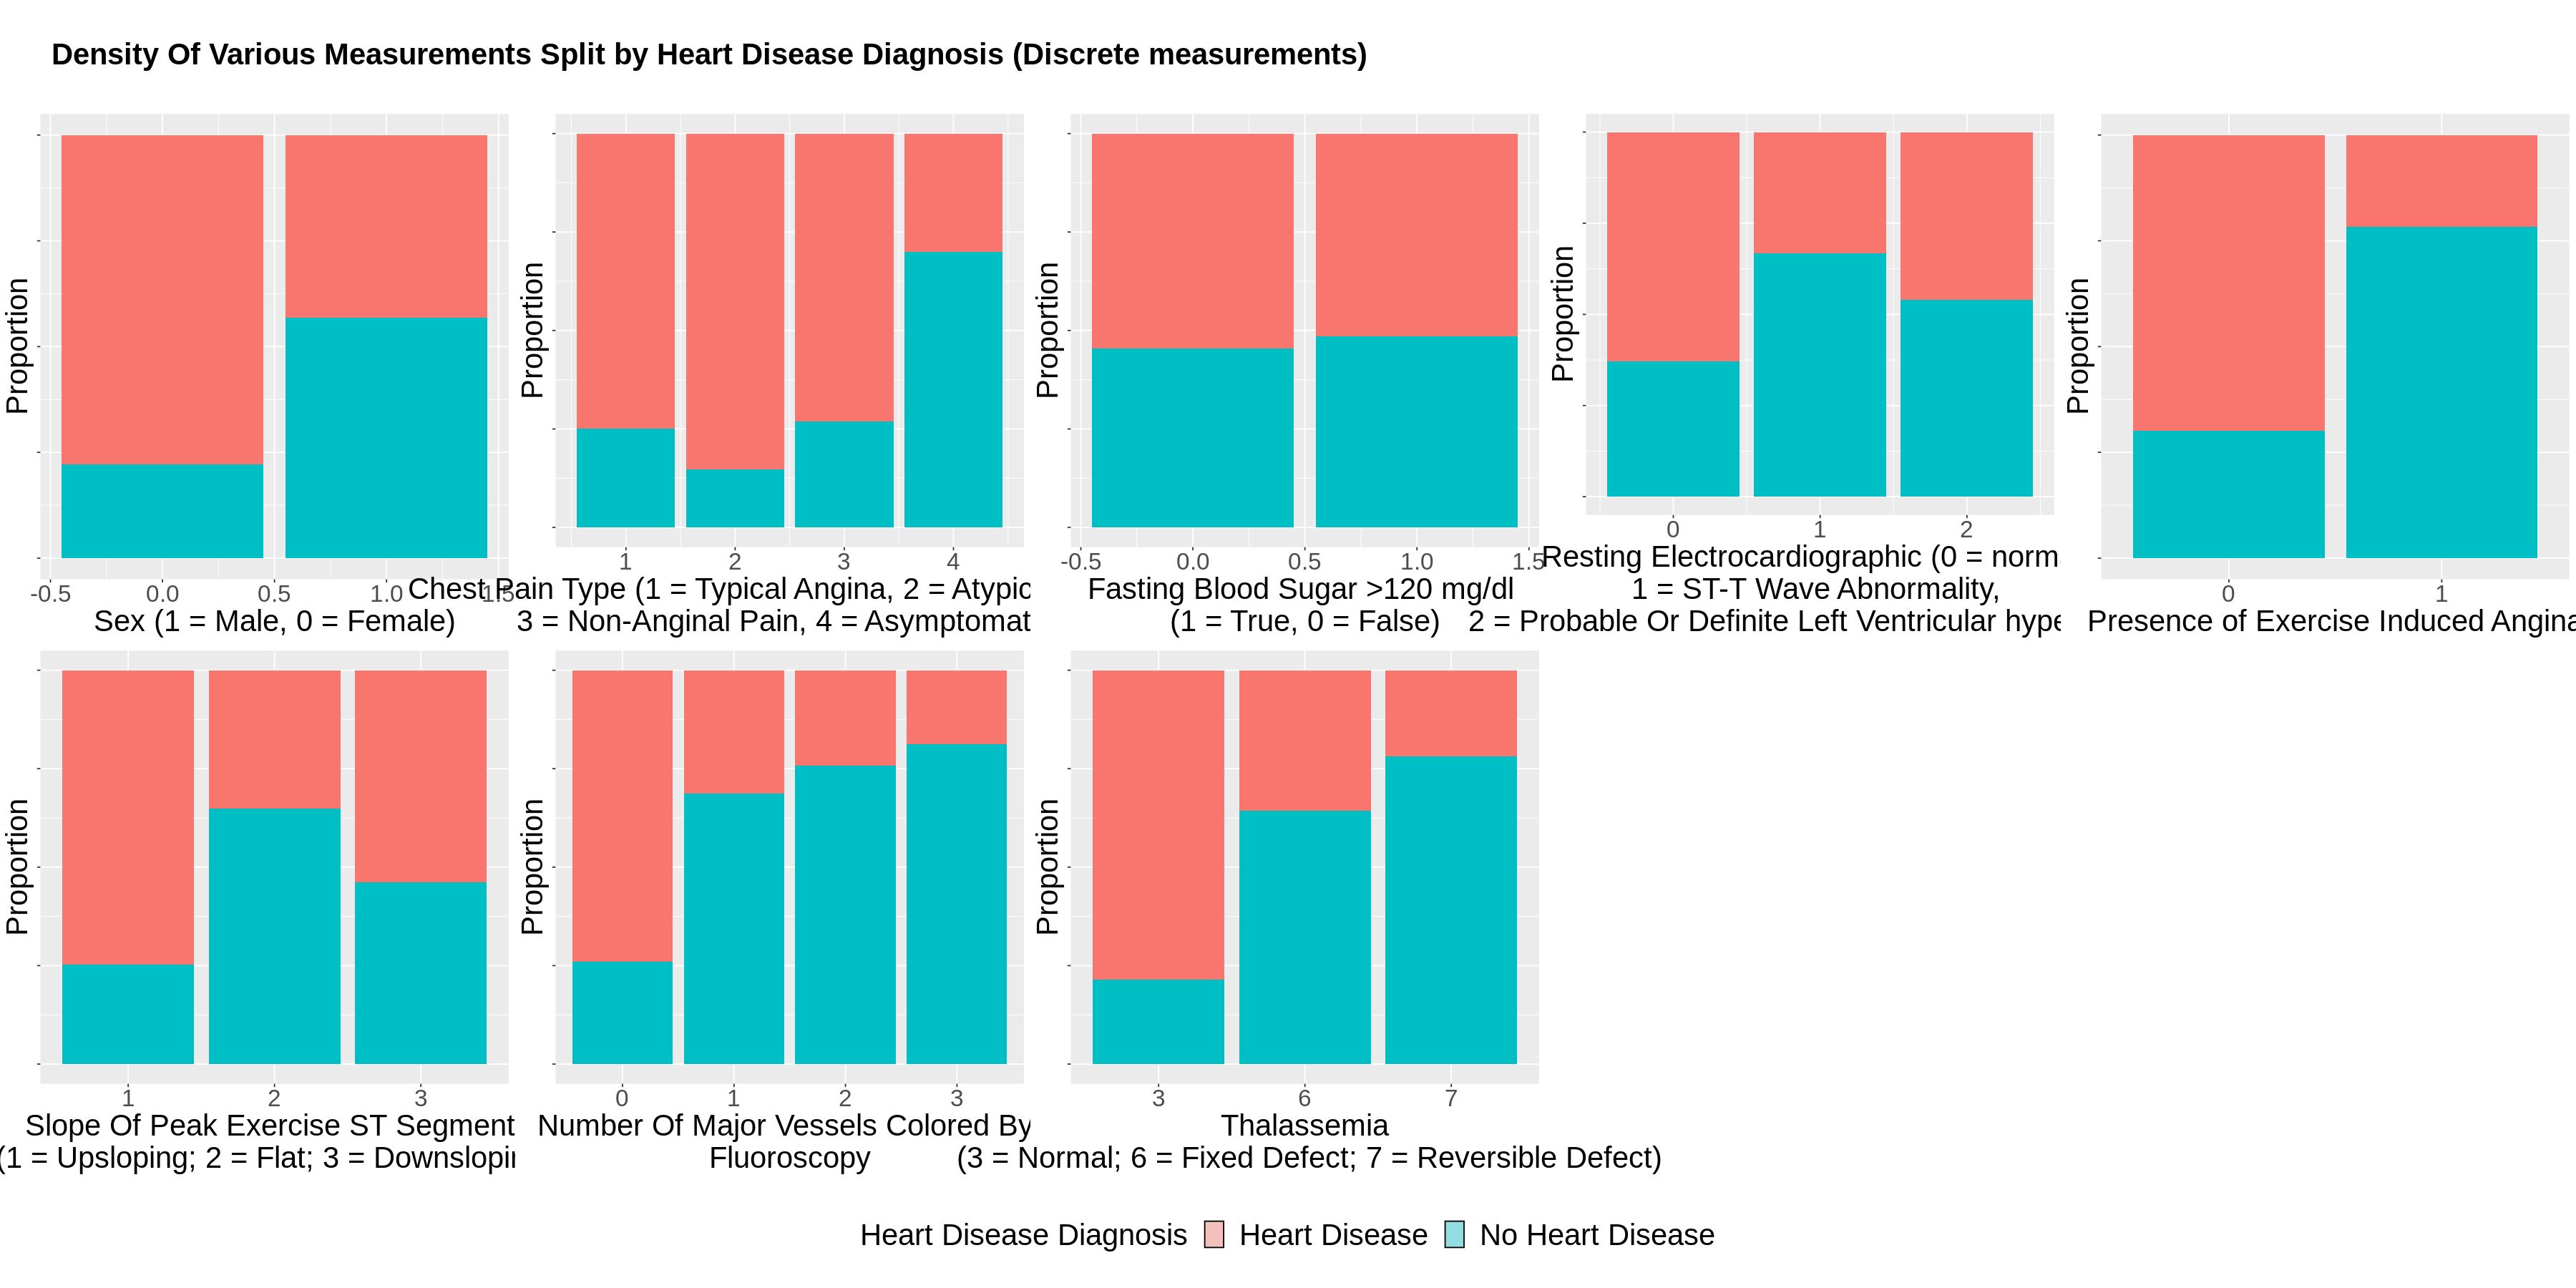

In [7]:
options(repr.plot.width=40, repr.plot.height=8)

##CONTINOUS VARIABLES##

##AGE##

heart_age_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 


heart_age_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_age_combined <- rbind(heart_age_table0, heart_age_table1)
#heart_age_combined


heart_age_plot <- ggplot(heart_age_combined, aes(x = Age, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Age", y = "Sample Density", fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                # ggtitle("Density of People With and \nWithout Heart Disease Vs Age") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank()) 
                 

##RBP##

heart_bp_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_combined <- rbind(heart_bp_table0, heart_bp_table1)
#heart_bp_combined

heart_bp_plot <- ggplot(heart_bp_combined, aes(x = Resting_Blood_Pressure, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Resting Blood Pressure (mm Hg)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                # ggtitle("Density of People With and \nWithout Heart Disease Vs \nResting Blood Pressure") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

##CHOLESTEROL##

heart_chol_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_combined <- rbind(heart_chol_table0, heart_chol_table1)


heart_chol_plot <- ggplot(heart_chol_combined, aes(x = Cholesterol, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Serum Cholesterol (mg/DL)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                # ggtitle("Density of People With and \nWithout Heart Disease Vs \nSerum Cholesterol") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

##MAX HEART RATE##


heart_hr_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_combined <- rbind(heart_hr_table0, heart_hr_table1)


heart_hr_plot <- ggplot(heart_hr_combined, aes(x = Max_Heart_Rate, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "Maximum Heart Rate (beats/min)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                 #ggtitle("Density of People With and \nWithout Heart Disease Vs \nMaximum Heart Rate") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

##DEPRESSION#

heart_st_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_combined <- rbind(heart_st_table0, heart_st_table1)


heart_st_plot <- ggplot(heart_st_combined, aes(x = ST_Depression, group = as.factor(Heart_Disease_Diagnosis), fill = as.factor(Heart_Disease_Diagnosis))) + 
                 geom_density(adjust = 1.5, alpha = 0.4) +
                 labs(x = "ST Depression Levels (mm)", y = NULL, fill = 'Heart Disease Diagnosis') +
                 scale_fill_discrete(labels=c('Heart Disease', 'No Heart Disease')) +
                 #ggtitle("Density of People With and \nWithout Heart Disease Vs \nMaximum Heart Rate") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())


###
title <- ggdraw() +
         draw_label('Density Of Various Measurements Split by Heart Disease Diagnosis',
                   fontface = 'bold',
                   x = 0.02,
                   hjust = 0,
                   size = 30) 

             
cont_grid <- plot_grid(heart_age_plot, heart_bp_plot, heart_chol_plot, heart_hr_plot, heart_st_plot, 
                       ncol = 5, labels = c('Age', 'RBP', 'Chol', 'HR', 'ST'), label_size = 20) 

legend_bottom <- get_legend(heart_age_plot + guides(color = guide_legend(now=1)) +
                            theme(legend.position = 'bottom', legend.text = element_text(size = 25), legend.title = element_text(size = 25)))

plot_grid(title, cont_grid, legend_bottom, ncol = 1, rel_heights = c(0.1, 1))


##DISCRETE VARIABLES##
options(repr.plot.width=30, repr.plot.height=15)


sex_plot <- training_data |>
   ggplot(aes(x = Sex, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Sex (1 = Male, 0 = Female)", y = "Proportion", fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())


cp_type_plot <- training_data |>
   ggplot(aes(x = Chest_Pain_Type, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, \n3 = Non-Anginal Pain, 4 = Asymptomatic)", 
        y = "Proportion", fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())


fbs_plot <- training_data |>
   ggplot(aes(x = Fasting_BloodSugar, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Fasting Blood Sugar >120 mg/dl \n(1 = True, 0 = False)", 
        y = "Proportion", fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())


restecg_plot <- training_data |>
   ggplot(aes(x = Resting_ECG, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Resting Electrocardiographic (0 = normal, \n1 = ST-T Wave Abnormality, \n2 = Probable Or Definite Left Ventricular hypertrophy)",
        y = "Proportion", fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())

bar_plot9 <- training_data |>
   ggplot(aes(x = as_factor(Exercise_Induced_Angina), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Presence of Exercise Induced Angina") +
   ylab("Proportion") +
   labs(fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())


bar_plot11 <- training_data |>
   ggplot(aes(x = as_factor(Slope), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Slope Of Peak Exercise ST Segment \n(1 = Upsloping; 2 = Flat; 3 = Downsloping)") +
   ylab("Proportion") +
   labs(fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())


bar_plot12 <- training_data |>
   filter(!is.na(Number_of_Major_Vessels)) |>
   ggplot(aes(x = as_factor(Number_of_Major_Vessels), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Number Of Major Vessels Colored By \nFluoroscopy") +
   ylab("Proportion") +
   labs(fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())


bar_plot13 <- training_data |>
   filter(!is.na(Thal)) |>
   ggplot(aes(x = as_factor(Thal), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Thalassemia\n (3 = Normal; 6 = Fixed Defect; 7 = Reversible Defect)") +
   ylab("Proportion") +
   labs(fill = "Heart Disease Diagnosis") +
                 theme(text = element_text(size = 25), legend.position = 'none', axis.text.y = element_blank())



cont_grid1 <- plot_grid(sex_plot, cp_type_plot, fbs_plot, restecg_plot, bar_plot9, bar_plot11, bar_plot12, bar_plot13,   
                       ncol = 5) 
title1 <- ggdraw() +
         draw_label('Density Of Various Measurements Split by Heart Disease Diagnosis (Discrete measurements)',
                   fontface = 'bold',
                   x = 0.02,
                   hjust = 0,
                   size = 25) 
plot_grid(title1, cont_grid1, legend_bottom, ncol = 1, rel_heights = c(0.1, 1))

### Methods:
We will be conducting predictor variable selection using all 13 variables in our dataset to determine their relevance in predicting heart disease diagnosis. To confirm our choice of variables, we will examine the bar chart visualization (percentage of people with heart disease against predictor variable). Continuous variables and categorical variables were visualized with different y-axis to help us visualize trends better. Then, we will use those subsetted variables to predict if a patient has heart disease using K-nearest neighbor classification tuned using a 5-fold cross-validation. 
For our visualization, we plan on plotting the estimated average accuracy of the classifier versus the K values that we used in our cross-validation. This visualization is relevant because it will help us choose a K value that maximizes accuracy, which is important as we want our model to make a prediction that is as accurate as possible.

### Expected outcomes and significance:
We expect to find that some of the variables are indicators of heart disease. Such findings can help inform doctors and patients of warning signs that they may be developing or having heart disease. They can also help doctors target specific heart disease factors for treatment such as lowering blood sugar or cholesterol levels, for example. This could lead to some future questions:
What other factors can lead to heart disease?
Which factor has the greatest effect on heart disease diagnosis?
